In [54]:
#first, we do EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path="./sms.csv"
sms_df = pd.read_csv(path)


In [55]:
#now we check for the missing values
missing_values=sms_df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Fraudolent       0
SMS test         0
ID               0
Date and Time    0
dtype: int64


<Axes: xlabel='Fraudolent', ylabel='Count'>

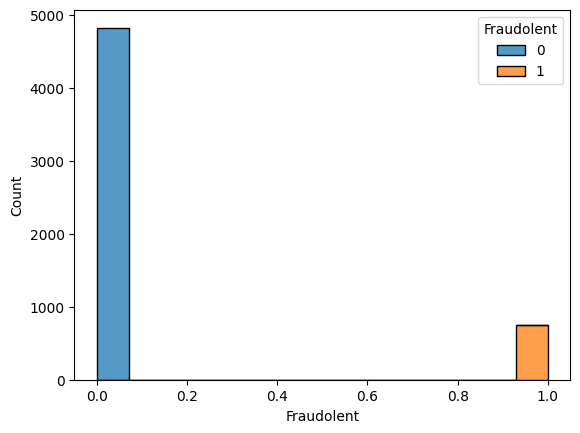

In [56]:
column_to_analyze = 'Fraudolent'

sns.histplot(sms_df, x = column_to_analyze, hue='Fraudolent', multiple = 'stack')

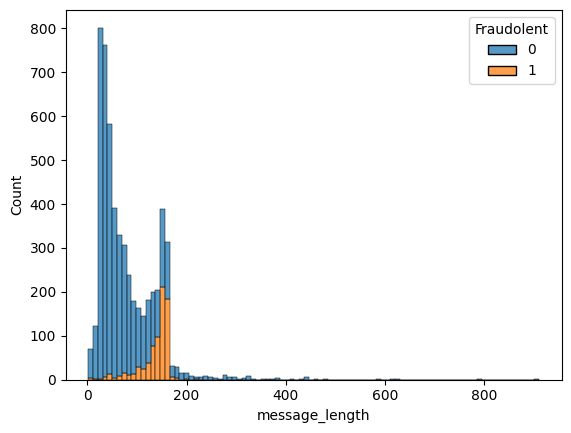

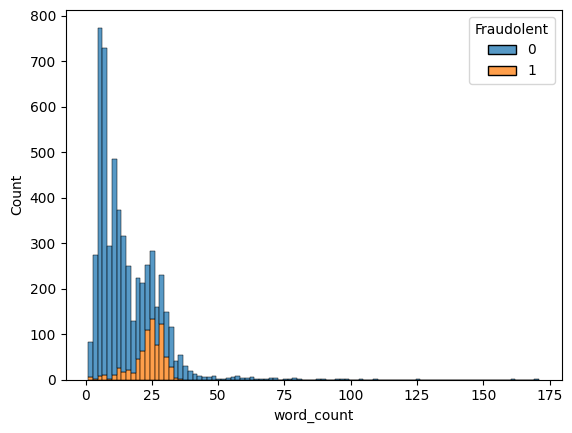

In [57]:
#we check if there is a correlation between the lenght of a message and if it is fraudolent or not
# this is how we check the length of every message
sms_df['message_length'] = sms_df['SMS test'].apply(len)

# and this is how we check the word count
sms_df['word_count'] = sms_df['SMS test'].apply(lambda x: len(str(x).split()))

sns.histplot(sms_df, x='message_length', hue='Fraudolent', multiple='stack')
plt.show()

sns.histplot(sms_df, x='word_count', hue='Fraudolent', multiple='stack')
plt.show()

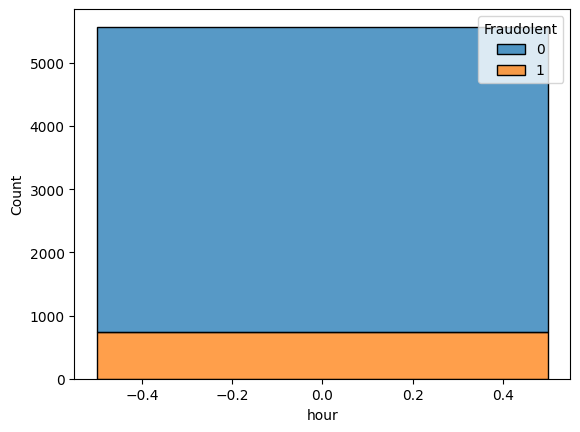

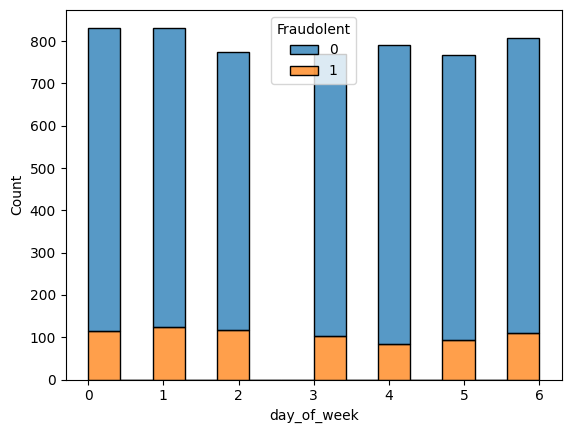

In [58]:
# we are trying to check if there is any correlation between time of day at which the message was sent and if it is fraudulent or not
sms_df['Date and Time'] = pd.to_datetime(sms_df['Date and Time'])


sms_df['hour'] = sms_df['Date and Time'].dt.hour

# we are also trying to check if there is a specific day in which more fraudulent sms are sent, maybe scammers don't work in the weekend
sms_df['day_of_week'] = sms_df['Date and Time'].dt.dayofweek

sns.histplot(sms_df, x='hour', hue='Fraudolent', multiple='stack')
plt.show()

sns.histplot(sms_df, x='day_of_week', hue='Fraudolent', multiple='stack')
plt.show()

# however, there seems to be no particular correlation

In [59]:
print(sms_df.columns)

Index(['Fraudolent', 'SMS test', 'ID', 'Date and Time', 'message_length',
       'word_count', 'hour', 'day_of_week'],
      dtype='object')


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object
vectorizer = CountVectorizer()

# Fit the CountVectorizer object to the data and then transform the data
X = vectorizer.fit_transform(sms_df['SMS test'])

# X is now a sparse matrix, which is way more readable than the text messages, at least for the ai

In [62]:
print(X)

  (0, 7226)	1
  (0, 7714)	1
  (0, 4229)	1
  (0, 2051)	1
  (0, 3995)	2
  (0, 4063)	2
  (0, 4637)	1
  (0, 5250)	1
  (0, 3404)	1
  (0, 2535)	1
  (0, 4964)	1
  (0, 1359)	1
  (0, 3519)	1
  (0, 2412)	1
  (0, 4808)	1
  (0, 7070)	1
  (0, 4796)	1
  (0, 5413)	1
  (0, 5795)	1
  (0, 3781)	1
  (1, 7070)	1
  (1, 1094)	1
  (1, 1054)	1
  (1, 8168)	1
  (1, 7124)	1
  :	:
  (5567, 2845)	1
  (5567, 4663)	1
  (5567, 8505)	1
  (5568, 1824)	1
  (5568, 4692)	1
  (5568, 4546)	1
  (5568, 7122)	1
  (5569, 3399)	1
  (5569, 3817)	1
  (5569, 6320)	1
  (5569, 6029)	1
  (5569, 7129)	1
  (5569, 7128)	1
  (5570, 5456)	1
  (5570, 7820)	1
  (5570, 6787)	1
  (5570, 4338)	1
  (5571, 4229)	1
  (5571, 4372)	1
  (5571, 3801)	1
  (5571, 6675)	1
  (5571, 7087)	1
  (5571, 7551)	1
  (5571, 2602)	1
  (5571, 5275)	1


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sms_df['SMS test'])

# we converge the target column to numpy array
y = sms_df['Fraudolent'].values

# splitting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# we do a prediction of the results
y_pred = classifier.predict(X_test)

# this is here to make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Computing Accuracy, Precision, Recall and F1 Score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy =", accuracy_score(y_test,y_pred))
print("Precision =", precision_score(y_test,y_pred))
print("Recall =", recall_score(y_test,y_pred))
print("F1 Score =", f1_score(y_test,y_pred))

print("Confusion Matrix:")
print(cm)

Accuracy = 0.9612347451543432
Precision = 0.9848484848484849
Recall = 0.7142857142857143
F1 Score = 0.8280254777070063
Confusion Matrix:
[[1209    2]
 [  52  130]]


In [65]:
from sklearn.preprocessing import StandardScaler


# vectorizing the email texts
tfidf_vectorizer = TfidfVectorizer(max_features=500)
X_text = tfidf_vectorizer.fit_transform(sms_df['SMS test']).toarray()

# We want to combine the text features with the email lenght to check if we get a more accurate result
X_length = sms_df[['message_length']].values
X = np.hstack((X_text, X_length))

y = sms_df['Fraudolent']

# splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# we do a prediction of the results
y_pred = classifier.predict(X_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# compute Accuracy, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# printing the results
print("Confusion Matrix:\n", cm)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Confusion Matrix:
 [[1195   16]
 [  14  168]]
Accuracy:  0.9784637473079684
Precision:  0.9130434782608695
Recall:  0.9230769230769231
F1 Score:  0.9180327868852459


Accuracy = 0.9820531227566404
Precision = 1.0
Recall = 0.8626373626373627
Confusion Matrix:
 [[1211    0]
 [  25  157]]


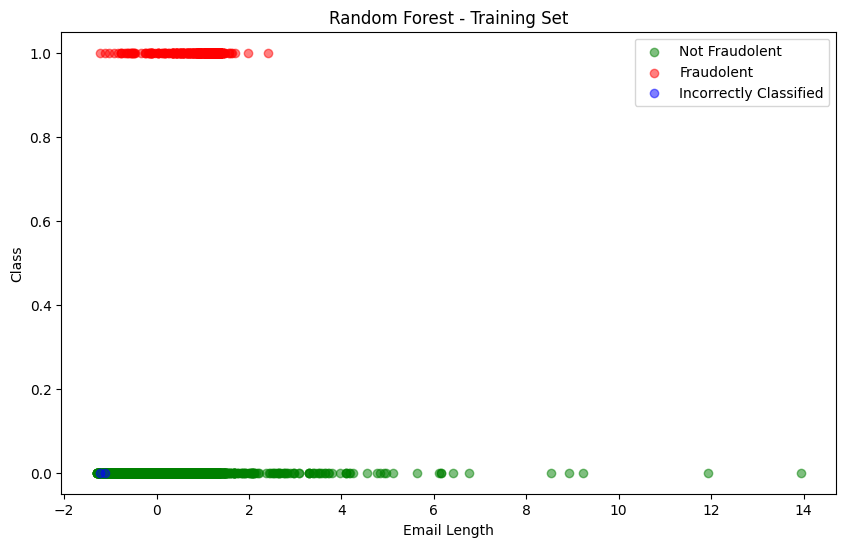

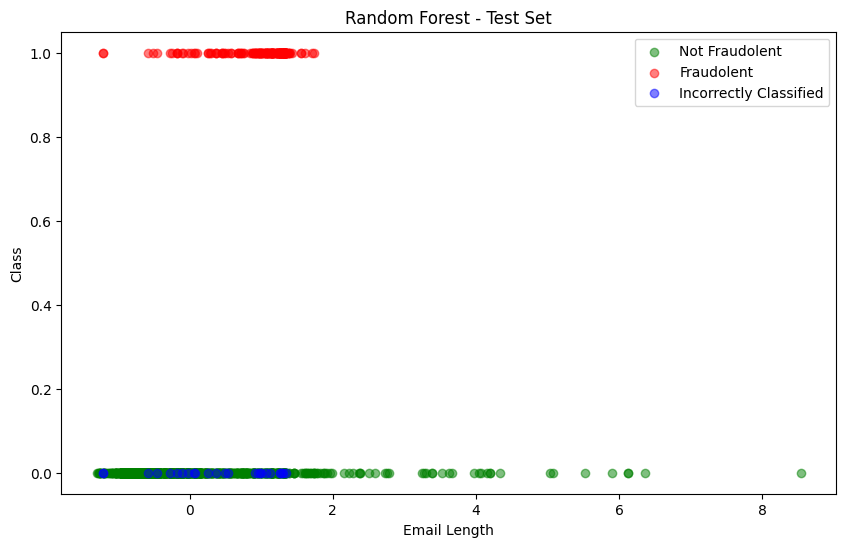

In [77]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm=confusion_matrix(y_test, y_pred)

print("Accuracy =", accuracy_score(y_test,y_pred))
print("Precision =", precision_score(y_test,y_pred))
print("Recall =", recall_score(y_test,y_pred))
print("Confusion Matrix:\n", cm)


# Function to plot the results
def plot_results(X, y, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0], y[y == 0], color='green', label='Not Fraudolent', alpha=0.5)
    plt.scatter(X[y == 1], y[y == 1], color='red', label='Fraudolent', alpha=0.5)
    plt.scatter(X[y_pred != y], y_pred[y_pred != y], color='blue', label='Incorrectly Classified', alpha=0.5)
    plt.title(title)
    plt.xlabel('Email Length')
    plt.ylabel('Class')
    plt.legend()
    plt.show()

# Predicting for the training set
y_train_pred = classifier.predict(X_train)
# Plotting for the training set
plot_results(X_train[:, -1], y_train, y_train_pred, 'Random Forest - Training Set')

# Plotting for the test set
plot_results(X_test[:, -1], y_test, y_pred, 'Random Forest - Test Set')

In [76]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
print("Accuracy =", accuracy_score(y_test,y_pred))
print("Precision =", precision_score(y_test,y_pred))
print("Recall =", recall_score(y_test,y_pred))
print("F1 Score =", f1_score(y_test,y_pred))
print("Confusion Matrix:\n", cm)

Accuracy = 0.9834888729361091
Precision = 0.9877300613496932
Recall = 0.8846153846153846
F1 Score = 0.9333333333333332
Confusion Matrix:
 [[1209    2]
 [  21  161]]


In [73]:
from sklearn.model_selection import GridSearchCV



# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# our model
svc = SVC(random_state=0)


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# best parameters
best_parameters = grid_search.best_params_
print("Best parameters: ", best_parameters)

# Train the model using the best parameters
best_model = SVC(**best_parameters)
best_model.fit(X_train, y_train)



# Predicting the Test set results with the best estimator
y_pred = best_model.predict(X_test)

# Compute our scores
print("Accuracy =", accuracy_score(y_test, y_pred))
print("Precision =", precision_score(y_test, y_pred))
print("Recall =", recall_score(y_test, y_pred))
print("F1 Score =", f1_score(y_test, y_pred))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best parameters:  {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy = 0.9849246231155779
Precision = 0.9820359281437125
Recall = 0.9010989010989011
F1 Score = 0.9398280802292263


In [74]:
from sklearn.model_selection import GridSearchCV


classifier = RandomForestClassifier(random_state=0)

#parameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get best parameters
best_parameters = grid_search.best_params_
print("Best parameters: ", best_parameters)

# Get best score
best_score = grid_search.best_score_
print("Best score: ", best_score)

# Predicting the Test set results with the best estimator
y_pred = grid_search.best_estimator_.predict(X_test)

# Compute the scores
print("Accuracy =", accuracy_score(y_test,y_pred))
print("Precision =", precision_score(y_test,y_pred))
print("Recall =", recall_score(y_test,y_pred))
print("F1 Score =", f1_score(y_test,y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: ignored

In [75]:
#here we are using randomized search to get fewer candidates, otherwise the code will take too long
from sklearn.model_selection import RandomizedSearchCV


# Define the model
classifier = LogisticRegression(random_state=0)

param_distributions = {
    'penalty': ['l2', 'none'],
    'C': np.logspace(-2, 2, 10),
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 1000, 2000]
}

# Initialize RandomizedSearchCV
randomized_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_distributions, n_iter=50, cv=2, n_jobs=-1, verbose=2, random_state=0)
# Fit RandomizedSearchCV to the training data
randomized_search.fit(X_train, y_train)

# Get best parameters
best_parameters = randomized_search.best_params_
print("Best parameters: ", best_parameters)

# Get best score
best_score = randomized_search.best_score_
print("Best score: ", best_score)

# Predicting the Test set results with the best estimator
y_pred = randomized_search.best_estimator_.predict(X_test)

# Compute the scores
print("Accuracy =", accuracy_score(y_test,y_pred))
print("Precision =", precision_score(y_test,y_pred))
print("Recall =", recall_score(y_test,y_pred))
print("F1 Score =", f1_score(y_test,y_pred))


Fitting 2 folds for each of 50 candidates, totalling 100 fits
Best parameters:  {'solver': 'saga', 'penalty': 'l2', 'max_iter': 2000, 'C': 0.0774263682681127}
Best score:  0.9806181158540636
Accuracy = 0.9870782483847811
Precision = 0.9767441860465116
Recall = 0.9230769230769231
F1 Score = 0.9491525423728814
